# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [3]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [5]:
# Your code here
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False) 
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [6]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [7]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?                     

Calculating the mean of Sepal.Length gives a basic point estimate. But it is better to identify the variabily of the distribution to know how much this average 'Sepal.Length' can vary.  

Bootstrap helps to estimate variability, confidence intervals and potentially uncover data characteristics like outliers or skeweness.          

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [8]:
# Add your code here to set the seed
bootstrap_values = []

def boot_SE(D, B, seed=0):
    rng = np.random.default_rng(seed=0)
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [9]:
# Your code here
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

5.84

In [10]:
# Your code here
df['Sepal.Length'].mean()

5.843333333333334

_(vi)_ What is the original mean value of `Sepal.Length`?

In [ ]:
# Your code here

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [11]:
# Add your code here
data = np.array(df['Sepal.Length'])
B= 1000

bootstrap_means = []
n = len(data)

for i in range(B):
    boot_se_samples = np.random.choice(data, size=n, replace=True)
    bootstrap_means.append(np.mean(boot_se_samples))
    
# Convert to numpy array for easier manipulation
bootstrap_means = np.array(bootstrap_means)

In [12]:

print(f"Bootstrap mean value: {np.mean(bootstrap_means)}")

print(f"Bootstrap mean standard deviation: {np.std(bootstrap_means)}")

Bootstrap mean value: 5.843940666666668
Bootstrap mean standard deviation: 0.067681821222541


The original mean value is 5.84 and the bootstrapped mean value is also 5.84 which is exactly the same. 
This indicates that original mean is a reasonable estimate of the population mean.

In [13]:
t_range = np.ptp(boot_se_samples)
t_range

3.6000000000000005

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [14]:
# Add your code here
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5]) 
print(f"95% Confidence Interval: {conf_interval}")

95% Confidence Interval: [5.71196667 5.98136667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

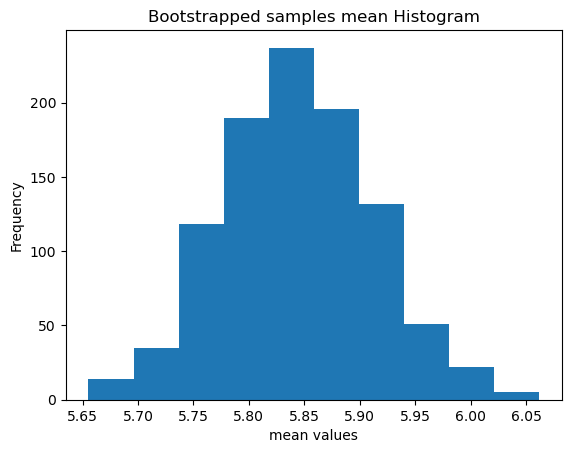

In [15]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
fig = plt.hist(bootstrap_means)

# Add a title
plt.title('Bootstrapped samples mean Histogram')

# Add a label to the x-axis
plt.xlabel('mean values')

# Add a label to the y-axis
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
'''Histogram shows number of times each bootstraped sample mean value appeared in the samples (1000 samples)'''

'Histogram shows number of times each bootstraped sample mean value appeared in the samples (1000 samples)'

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [17]:
'''1. For initial space allocation the shipping company can consider the average sepal length in the iris shipment 
as the original mean sepal length (5.84).
Because bootsrap mean was exactly same as the original mean (considering 2 decimal places).

2. The boostrap standard deviation is 0.06, so the company should allocate extra space to accommodate sepals that is 
slightly larger than average (5.84). 95% of the time the sepal length will be between 5.7 and 5.97.

3. The narrow spread of the above histogram indicates there is less variabilty in the sepal length.
The company can use the spread of the above histogram to adjust buffer space allocation.'''

'1. For initial space allocation the shipping company can consider the average sepal length in the iris shipment \nas the original mean sepal length (5.84).\nBecause bootsrap mean was exactly same as the original mean (considering 2 decimal places).\n\n2. The boostrap standard deviation is 0.06, so the company should allocate extra space to accommodate sepals that is \nslightly larger than average (5.84). 95% of the time the sepal length will be between 5.7 and 5.97.\n\n3. The narrow spread of the above histogram indicates there is less variabilty in the sepal length.\nThe company can use the spread of the above histogram to adjust buffer space allocation.'

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
